In [80]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

NUM_CLASSES = 10


class Classifier2(nn.Module):
    def __init__(self):
        super(Classifier2, self).__init__()

      
        # fully connected NN
        f = 5
        in1 = 1
        out1 = 6
        out2 = 12
        in2 = 6 
        out = 120
        self.c1 = nn.Conv2d(in_channels= in1, out_channels=out1, kernel_size=(f,f))
        self.N1 = nn.BatchNorm2d(num_features=6)
        self.c2 = nn.Conv2d(in_channels= in2, out_channels= out2, kernel_size=(f,f))
        self.fc1 = nn.Linear(in_features= out2*4*4, out_features= out)
        self.N2 = nn.BatchNorm1d(num_features= out)
        self.fc2 = nn.Linear(in_features= out, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        # convolutional NN
        # self.conv1 = nn.Conv2d(1, 64, 5)
        # self.conv2 = nn.Conv2d(64, 32, 3)
        # self.conv3 = nn.Conv2d(32, 16, 3)
        # self.pool = nn.MaxPool2d(2, 2)
        # self.fc1 = nn.Linear(16 * 10 * 10, 120)
        # self.fc2 = nn.Linear(256, 266)
        # self.fc3 = nn.Linear(256, NUM_CLASSES)


      

    def forward(self, x):
        x = self.c1(x)
        x = F.max_pool2d(input=x, kernel_size=2, stride=2)
        x = F.relu(x)
        x = self.N1(x)
    
        x = self.c2(x)
        x = F.max_pool2d(input=x, kernel_size=2, stride=2)
        x = F.relu(x)
  
        x = x.reshape(-1, 12*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.N2(x)
        x = self.fc2(x)
        x = F.relu(x)
       
        x = self.out(x)
        return x


In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

NUM_CLASSES = 10


class Classifier1(nn.Module):
    def __init__(self):
        super(Classifier1, self).__init__()

      
        # fully connected NN
        #self.fc1 = nn.Linear(28 * 28, 256)
        #self.fc2 = nn.Linear(256, NUM_CLASSES)
        self.dense1 = nn.Linear(28*28, 256)
        self.dense2 = nn.Linear(256, 128)
        self.dense3 = nn.Linear(128, 64)
        self.dense4 = nn.Linear(64, 10)
        # convolutional NN
        # self.conv1 = nn.Conv2d(1, 64, 5)
        # self.conv2 = nn.Conv2d(64, 32, 3)
        # self.conv3 = nn.Conv2d(32, 16, 3)
        # self.pool = nn.MaxPool2d(2, 2)
        # self.fc1 = nn.Linear(16 * 10 * 10, 120)
        # self.fc2 = nn.Linear(256, 266)
        # self.fc3 = nn.Linear(256, NUM_CLASSES)


      

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.dense1(x))
        x = F.relu(self.dense2(x))
        x = F.relu(self.dense3(x))
        x = F.log_softmax(self.dense4(x), dim=1)
        return x


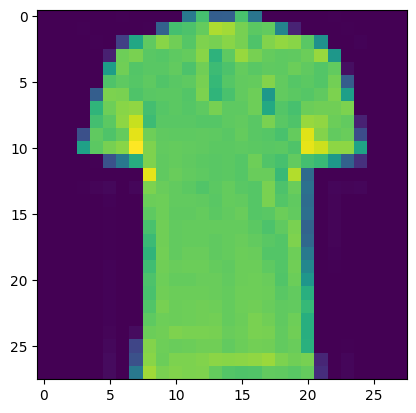

In [6]:
import os
import numpy as np
import torch
import torchvision.transforms as transforms
import torch.utils.data as data
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import gzip

FASHION_MNIST_CLASSES = ('T-shirt', 'Trouser', 'Pullover',
                         'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot')


def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '/content/%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '/content/%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


class fashion_mnist_dataset(data.Dataset):
    def __init__(self, split, transform):
        self.split = split
        self.num_training = 50000
        self.num_validation = 10000
        self.num_test = 10000
        self.normalize = True
        self.transform = transform

        # Load the raw FASHION data
        if self.split == 'train':
            X, y = load_mnist('fashion-mnist', kind='train')
            mask = list(range(self.num_training))
            self.X = X[mask].astype(float)
            self.y = y[mask]
        elif self.split == 'val':
            X, y = load_mnist('fashion-mnist', kind='train')
            mask = list(range(self.num_training,
                        self.num_training + self.num_validation))
            self.X = X[mask].astype(float)
            self.y = y[mask]
        elif self.split == 'test':
            X, y = load_mnist('fashion-mnist', kind='t10k')
            mask = list(range(self.num_test))
            self.X = X[mask].astype(float)
            self.y = y[mask]

        '''
        if self.normalize:
            X_train, _ = load_mnist('fashion-mnist', kind='train')
            mask = list(range(self.num_training))
            X_train = X_train[mask].astype(float)

            mean_image = np.mean(X_train, axis=0)
            self.X -= mean_image
        '''

    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        x = self.X[index]
        x = x.reshape((28, 28))
        x = torch.tensor(x).float().unsqueeze(0) / 255.

        y = self.y[index]
        y = torch.tensor(y).long()

        return x, y


if __name__ == "__main__":
    ds_val = fashion_mnist_dataset('val', None)

    x, y = ds_val[3]
    x = x.numpy()[0]

    plt.imshow(x)
    plt.show()


In [61]:
import os
import csv
import numpy as np

def write_csv(file_path, y_list):
    solution_rows = [('id', 'category')] + [(i, np.sqrt(y)) for (i, y) in enumerate(y_list)]
    with open(file_path, 'w') as f:
        writer = csv.writer(f)
        writer.writerows(solution_rows)

def output_submission_csv(output_file_path, y_test):
    write_csv(output_file_path, y_test)


In [11]:
import os
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
from sklearn.metrics import average_precision_score
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
#from kaggle_submission import output_submission_csv
#from classifier import Classifier
#from fashion_mnist_dataloader import fashion_mnist_dataset, load_mnist, FASHION_MNIST_CLASSES


%matplotlib inline
%load_ext autoreload
%autoreload 2i

In [12]:
# Transforms applied to the training data
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std= [0.229, 0.224, 0.225])

train_transform = transforms.Compose([
            #transforms.Resize(227),
            #transforms.CenterCrop(227),
            #transforms.ToTensor(),
            #normalize
        ])


In [13]:
ds_train = fashion_mnist_dataset('train', train_transform)
len(ds_train)

50000

In [14]:
# Transforms applied to the testing data
test_transform = transforms.Compose([
            #transforms.Resize(227),
            #transforms.CenterCrop(227),
            #transforms.ToTensor(),
            #normalize,
        ])

In [15]:
ds_val = fashion_mnist_dataset('val', test_transform)
len(ds_val)

10000

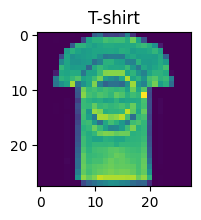

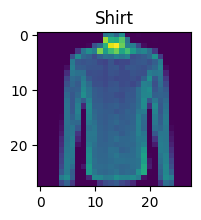

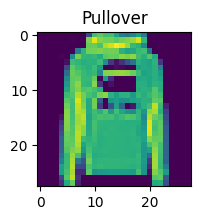

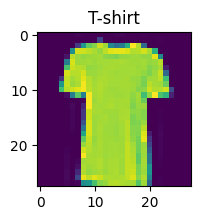

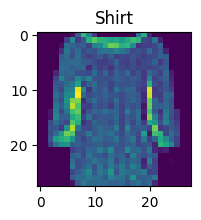

In [16]:
X_train, Y_train = load_mnist('fashion-mnist', kind='train')
mask = list(range(len(ds_train)))
X_train = X_train[mask]

for i in range(5):
    idx = np.random.randint(0, len(ds_train))
    img, label = X_train[idx], Y_train[idx]
    img = img.reshape((28, 28))
    plt.figure(figsize = (2,2))
    plt.title(f'{FASHION_MNIST_CLASSES[label]}')
    plt.imshow(img)

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [18]:
train_loader = torch.utils.data.DataLoader(dataset=ds_train,
                                               batch_size=64, 
                                               shuffle=True,
                                               num_workers=1)

In [19]:
val_loader = torch.utils.data.DataLoader(dataset=ds_val,
                                               batch_size=5, 
                                               shuffle=False,
                                               num_workers=1)

In [20]:
def train_classifier(train_loader, classifier, criterion, optimizer):
    classifier.train()
    loss_ = 0.0
    losses = []
    losses_plot = []
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        logits = classifier(images)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss)
        losses_plot.append(loss.detach().item())

    return torch.stack(losses).mean().item(), losses_plot

In [39]:
def test_classifier(test_loader, classifier, criterion, print_ind_classes=True):
    classifier.eval()
    losses = []
    with torch.no_grad():
        y_true = np.zeros((0))
        y_score = np.zeros((0,10))
        for i, (images, labels) in enumerate(test_loader):
            images, labels = images.to(device), labels.to(device)
            logits = classifier(images)
            y_true = np.concatenate((y_true, labels.cpu().numpy()), axis=0)
            y_score = np.concatenate((y_score, logits.cpu().numpy()), axis=0)
            loss = criterion(logits, labels)
            losses.append(loss.item())
        aps = []
        
        B = y_true.shape[0]
        y_true_one_hot = np.zeros((B, 10))
        y_true_one_hot[np.arange(B), y_true.astype(np.int16)] = 1

        for i in range(10):
            ap = average_precision_score(y_true_one_hot[:, i], y_score[:, i])
            if print_ind_classes:
                print(f'-------  Class: {i}     AP: {ap:>8.4f}  -------')
            aps.append(ap)
        
        mAP = np.mean(aps)
        test_loss = np.mean(losses)
        print('mAP: {0:.4f}'.format(mAP))
        print('Avg loss: {}'.format(test_loss))
        
    return mAP, test_loss, aps

In [47]:
classifier = Classifier1().to(device)
# You can can use this function to reload a network you have already saved previously
#classifier.load_state_dict(torch.load('voc_classifier.pth'))

In [48]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(classifier.parameters(), lr=0.01, momentum=0.9)

In [66]:
# Training the Classifier
NUM_EPOCHS = 75
TEST_FREQUENCY = 5

for epoch in range(1, NUM_EPOCHS+1):
    print("Starting epoch number " + str(epoch))
    train_loss, losses = train_classifier(train_loader, classifier, criterion, optimizer)
    print("Loss for Training on Epoch " +str(epoch) + " is "+ str(train_loss))
    if(epoch%TEST_FREQUENCY==0):
        mAP_val, val_loss, _ = test_classifier(val_loader, classifier, criterion)
        print('Evaluating classifier')
        print("Mean Precision Score for Testing on Epoch " +str(epoch) + " is "+ str(mAP_val))
         

Starting epoch number 1
Loss for Training on Epoch 1 is 0.10636098682880402
Starting epoch number 2
Loss for Training on Epoch 2 is 0.12317101657390594
Starting epoch number 3
Loss for Training on Epoch 3 is 0.10909658670425415
Starting epoch number 4
Loss for Training on Epoch 4 is 0.10280058532953262
Starting epoch number 5
Loss for Training on Epoch 5 is 0.10370258241891861
-------  Class: 0     AP:   0.7909  -------
-------  Class: 1     AP:   0.9924  -------
-------  Class: 2     AP:   0.7600  -------
-------  Class: 3     AP:   0.8777  -------
-------  Class: 4     AP:   0.8220  -------
-------  Class: 5     AP:   0.9813  -------
-------  Class: 6     AP:   0.5838  -------
-------  Class: 7     AP:   0.8852  -------
-------  Class: 8     AP:   0.9841  -------
-------  Class: 9     AP:   0.9663  -------
mAP: 0.8644
Avg loss: 0.45679555874628514
Evaluating classifier
Mean Precision Score for Testing on Epoch 5 is 0.8643801842074191
Starting epoch number 6
Loss for Training on Epoch

In [84]:
classifier2 = Classifier2().to(device)
# You can can use this function to reload a network you have already saved previously
#classifier.load_state_dict(torch.load('voc_classifier.pth'))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(classifier2.parameters(), lr=0.01, momentum=0.9)
# Training the Classifier
NUM_EPOCHS = 30
TEST_FREQUENCY = 5

for epoch in range(1, NUM_EPOCHS+1):
    print("Starting epoch number " + str(epoch))
    train_loss, losses = train_classifier(train_loader, classifier2, criterion, optimizer)
    print("Loss for Training on Epoch " +str(epoch) + " is "+ str(train_loss))
    if(epoch%TEST_FREQUENCY==0):
        mAP_val, val_loss, _ = test_classifier(val_loader, classifier2, criterion)
        print('Evaluating classifier')
        print("Mean Precision Score for Testing on Epoch " +str(epoch) + " is "+ str(mAP_val))
         

Starting epoch number 1
Loss for Training on Epoch 1 is 0.5300207734107971
Starting epoch number 2
Loss for Training on Epoch 2 is 0.3670167326927185
Starting epoch number 3
Loss for Training on Epoch 3 is 0.3248632550239563
Starting epoch number 4
Loss for Training on Epoch 4 is 0.3031860888004303
Starting epoch number 5
Loss for Training on Epoch 5 is 0.2853114604949951
-------  Class: 0     AP:   0.9039  -------
-------  Class: 1     AP:   0.9937  -------
-------  Class: 2     AP:   0.8253  -------
-------  Class: 3     AP:   0.9450  -------
-------  Class: 4     AP:   0.8257  -------
-------  Class: 5     AP:   0.9735  -------
-------  Class: 6     AP:   0.5581  -------
-------  Class: 7     AP:   0.9745  -------
-------  Class: 8     AP:   0.9917  -------
-------  Class: 9     AP:   0.9835  -------
mAP: 0.8975
Avg loss: 0.30489504712109194
Evaluating classifier
Mean Precision Score for Testing on Epoch 5 is 0.8974920523127274
Starting epoch number 6
Loss for Training on Epoch 6 is

In [67]:
# Save the clssifier network
# Suggestion: you can save checkpoints of your network during training and reload them later
torch.save(classifier.state_dict(), './fashion_mnist_classifier.pth')

In [73]:
ds_test = fashion_mnist_dataset('test', test_transform)

test_loader = torch.utils.data.DataLoader(dataset=ds_test,
                                               batch_size=50, 
                                               shuffle=False,
                                               num_workers=1)

mAP_test, test_loss, test_aps = test_classifier(test_loader, classifier, criterion)

-------  Class: 0     AP:   0.8009  -------
-------  Class: 1     AP:   0.9951  -------
-------  Class: 2     AP:   0.8053  -------
-------  Class: 3     AP:   0.8765  -------
-------  Class: 4     AP:   0.8432  -------
-------  Class: 5     AP:   0.9809  -------
-------  Class: 6     AP:   0.5904  -------
-------  Class: 7     AP:   0.8718  -------
-------  Class: 8     AP:   0.9779  -------
-------  Class: 9     AP:   0.9694  -------
mAP: 0.8712
Avg loss: 0.692728458433412


In [74]:
output_submission_csv('my_solution.csv', test_aps)

In [85]:
ds_test = fashion_mnist_dataset('test', test_transform)

test_loader = torch.utils.data.DataLoader(dataset=ds_test,
                                               batch_size=50, 
                                               shuffle=False,
                                               num_workers=1)

mAP_test, test_loss, test_aps = test_classifier(test_loader, classifier2, criterion)

-------  Class: 0     AP:   0.8671  -------
-------  Class: 1     AP:   0.9972  -------
-------  Class: 2     AP:   0.8226  -------
-------  Class: 3     AP:   0.9027  -------
-------  Class: 4     AP:   0.7886  -------
-------  Class: 5     AP:   0.9817  -------
-------  Class: 6     AP:   0.6196  -------
-------  Class: 7     AP:   0.9625  -------
-------  Class: 8     AP:   0.9656  -------
-------  Class: 9     AP:   0.9609  -------
mAP: 0.8869
Avg loss: 0.352341435123235


In [87]:
output_submission_csv('my_solution1.csv', test_aps)